In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [9]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
print(df.shape)

(7043, 21)


In [10]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


TARGET VARIABLE

In [ ]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

UNIVARIATE ANALYSIS

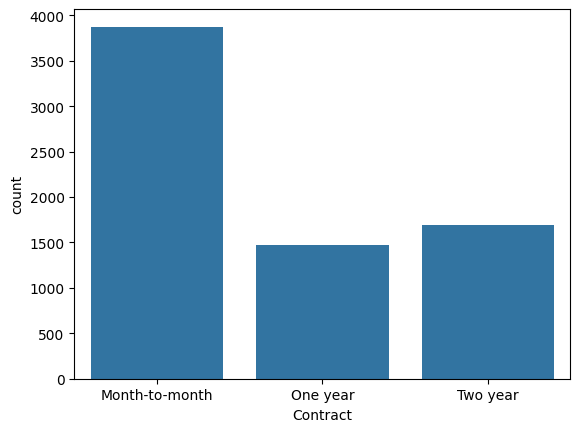

In [14]:
sns.countplot(x='Contract', data=df)
plt.show()

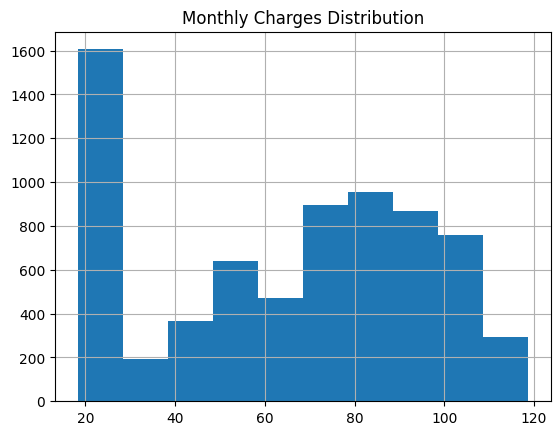

In [15]:
df['MonthlyCharges'].hist()
plt.title("Monthly Charges Distribution")
plt.show()

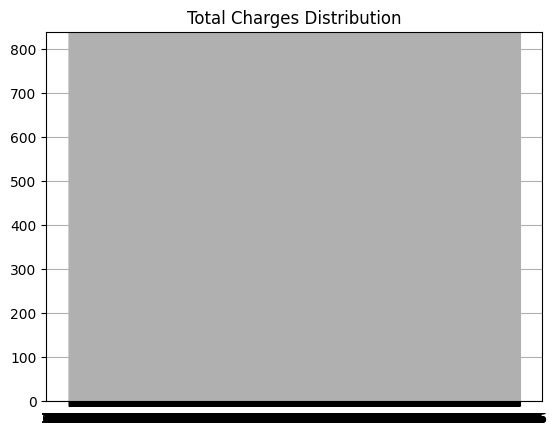

In [16]:
df['TotalCharges'].hist()
plt.title("Total Charges Distribution")
plt.show()

BIVARIATE ANALYSIS

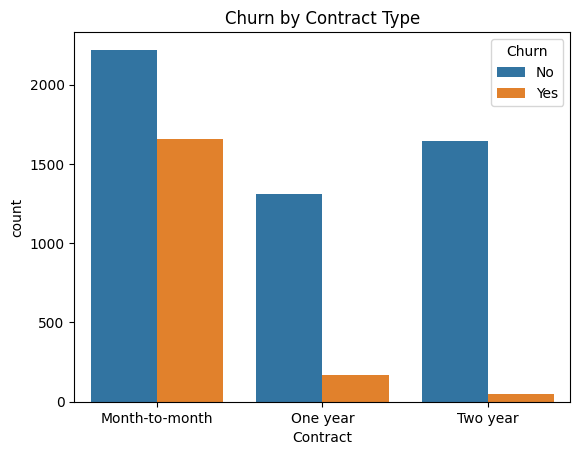

In [19]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

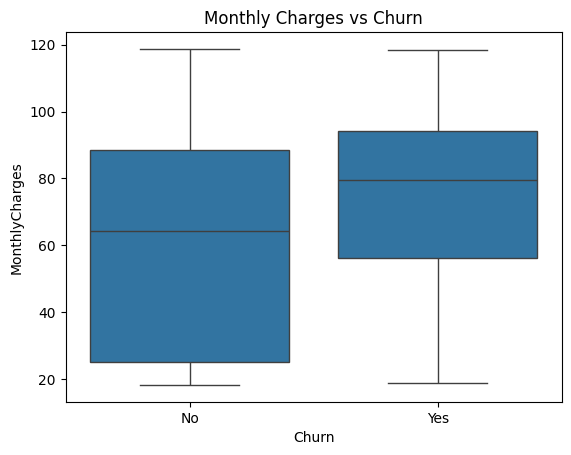

In [20]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


MISSING VALUE

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())

df.dropna(inplace=True)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


CATEGORIAL VARIABLES

In [22]:
df.drop('customerID', axis=1, inplace=True)  # Drop ID column

df = pd.get_dummies(df, drop_first=True)

FEATURE ENGINEERING

In [54]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60,72],
                            labels=['0-12','12-24','24-48','48-60','60-72'])

# Before encoding
print(" tenure_group value counts before encoding:")
print(df['tenure_group'].value_counts())


df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)

# After encoding
print("\n Columns after one-hot encoding tenure_group:")
print(df.columns[df.columns.str.startswith('tenure_group_')])

 tenure_group value counts before encoding:
tenure_group
0-12     2175
24-48    1594
60-72    1407
12-24    1024
48-60     832
Name: count, dtype: int64

 Columns after one-hot encoding tenure_group:
Index(['tenure_group_12-24', 'tenure_group_24-48', 'tenure_group_48-60',
       'tenure_group_60-72', 'tenure_group_12-24', 'tenure_group_24-48',
       'tenure_group_48-60', 'tenure_group_60-72', 'tenure_group_12-24',
       'tenure_group_24-48', 'tenure_group_48-60', 'tenure_group_60-72'],
      dtype='object')


CORREALATION MATRIX

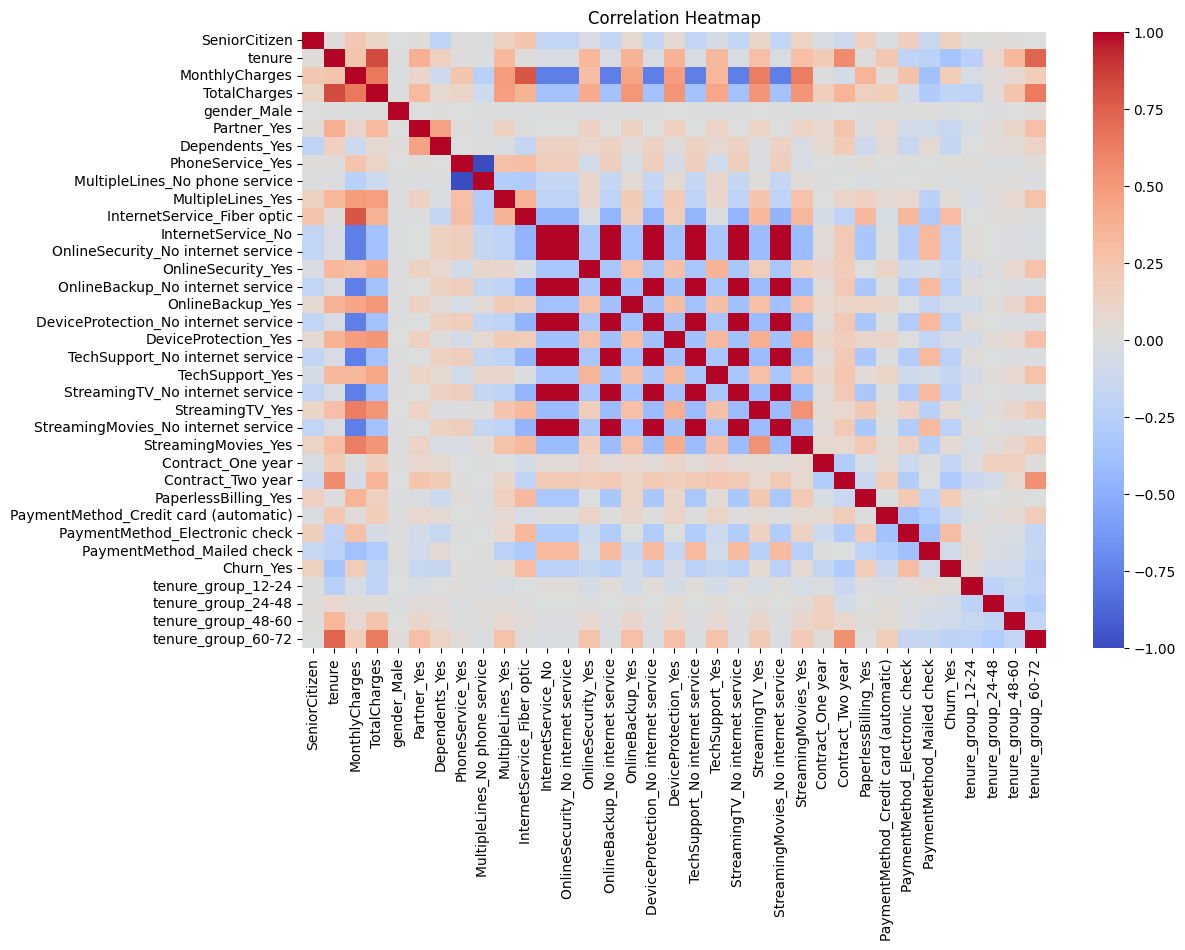

In [24]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

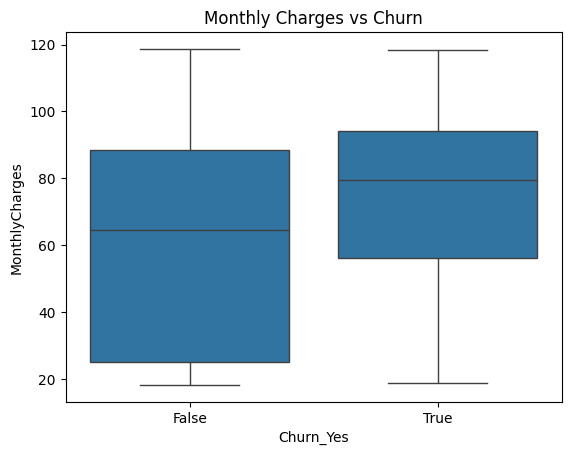

In [27]:
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

KEY SEGMENTS VISUALIZE

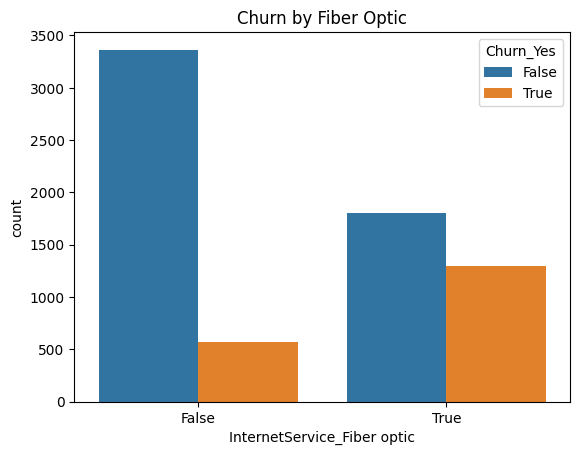

In [28]:
sns.countplot(x='InternetService_Fiber optic', hue='Churn_Yes', data=df)
plt.title("Churn by Fiber Optic")
plt.show()


SPLIT FEATURE AND TARGET

In [30]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

TRAIN/TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print(f" Train shape: {X_train.shape}, Test shape: {X_test.shape}")

 Train shape: (5625, 34), Test shape: (1407, 34)


MODEL TRAINING

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

LOGISTIC REGRESSION

In [51]:
print("\n📊 Logistic Regression Evaluation")
y_pred_log = log_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))


📊 Logistic Regression Evaluation
Confusion Matrix:
 [[919 114]
 [177 197]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Accuracy Score: 0.7931769722814499


RANDOM FOREST

In [52]:
print("\n🌲 Random Forest Evaluation")
y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


🌲 Random Forest Evaluation
Confusion Matrix:
 [[931 102]
 [186 188]]

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.87      1033
        True       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407

Accuracy Score: 0.7953091684434968
